In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flatten layer
        self.flatten = nn.Flatten()

        # First fully connected layer
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        # Dropout layer
        self.dropout1 = nn.Dropout(p=0.5)
        # Second fully connected layer
        self.fc2 = nn.Linear(256, 128)
        # Dropout layer
        self.dropout2 = nn.Dropout(p=0.5)
        # Output layer for binary classification
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = self.flatten(x)  # Flatten the layer

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first FC layer
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second FC layer
        x = torch.sigmoid(self.fc3(x))  # Apply sigmoid to output layer for binary classification
        return x

# Model, Loss Function, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
!pip install torchsummary


In [ ]:
from torchsummary import summary
summary(model, (3, 256, 256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
         MaxPool2d-2         [-1, 32, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          18,496
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5          [-1, 128, 64, 64]          73,856
         MaxPool2d-6          [-1, 128, 32, 32]               0
           Flatten-7               [-1, 131072]               0
            Linear-8                  [-1, 256]      33,554,688
           Dropout-9                  [-1, 256]               0
           Linear-10                  [-1, 128]          32,896
          Dropout-11                  [-1, 128]               0
           Linear-12                    [-1, 1]             129
Total params: 33,680,961
Trainable params: 33,680,961
Non-trainable params: 0
-------------------------

In [ ]:
!pip install torchviz torchsummary
!apt-get install graphviz


  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
from torchviz import make_dot
# Exemple d'entrée
x = torch.randn(1, 3, 256, 256).to(device)

# Générer le graphe
y = model(x)
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('cnn_torchviz')


'cnn_torchviz.png'

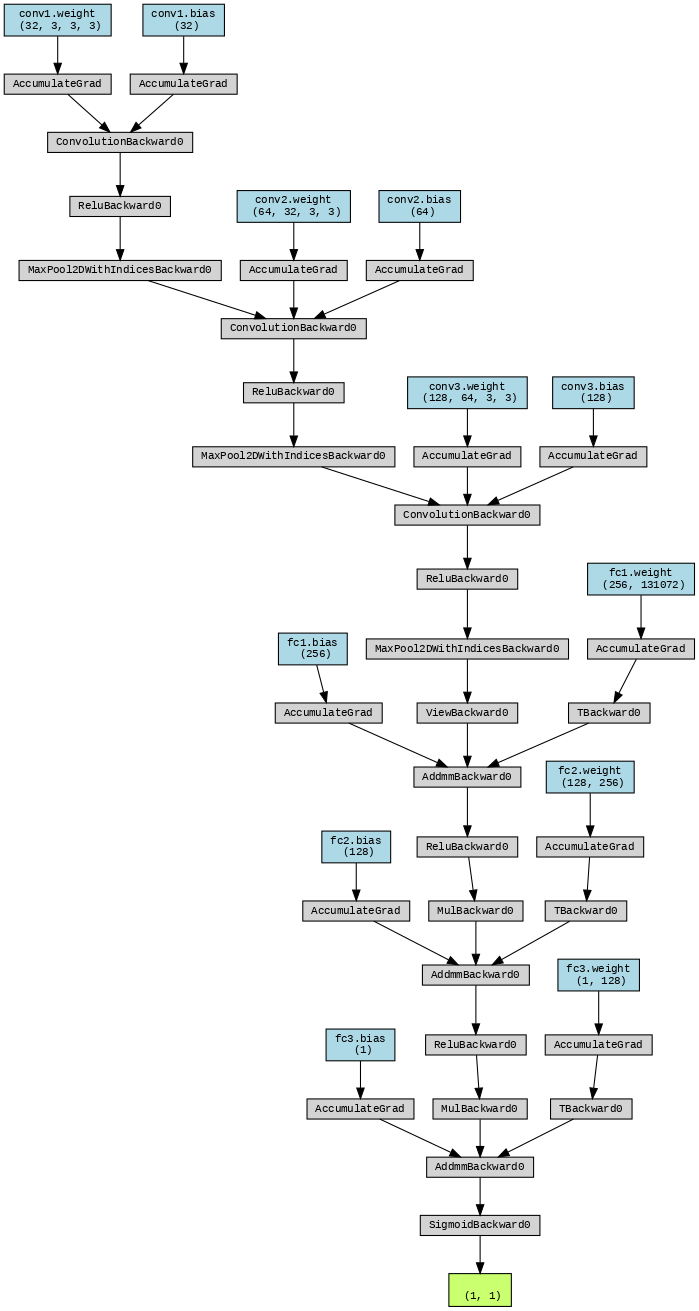

In [ ]:
from IPython.display import Image
Image(filename='cnn_torchviz.png')


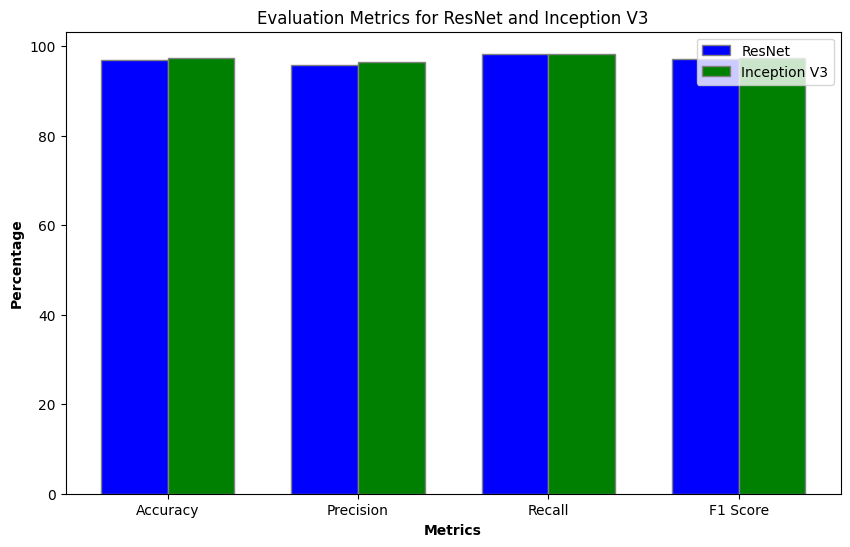

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for ResNet
resnet_metrics = {
    'Accuracy': 96.97,
    'Precision': 95.87,
    'Recall': 98.31,
    'F1 Score': 97.07
}

# Metrics for Inception V3
inceptionv3_metrics = {
    'Accuracy': 97.32,
    'Precision': 96.43,
    'Recall': 98.18,
    'F1 Score': 97.30
}

# Names of the metrics
metrics_names = list(resnet_metrics.keys())

# Values for the metrics
resnet_values = list(resnet_metrics.values())
inceptionv3_values = list(inceptionv3_metrics.values())

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
r1 = np.arange(len(resnet_values))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 6))

# Create bars for ResNet
plt.bar(r1, resnet_values, color='b', width=bar_width, edgecolor='grey', label='ResNet')

# Create bars for Inception V3
plt.bar(r2, inceptionv3_values, color='g', width=bar_width, edgecolor='grey', label='Inception V3')

# Add title and labels
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Evaluation Metrics for ResNet and Inception V3')
plt.xticks([r + bar_width/2 for r in range(len(resnet_values))], metrics_names)

# Add legend
plt.legend()

# Show the plot
plt.show()


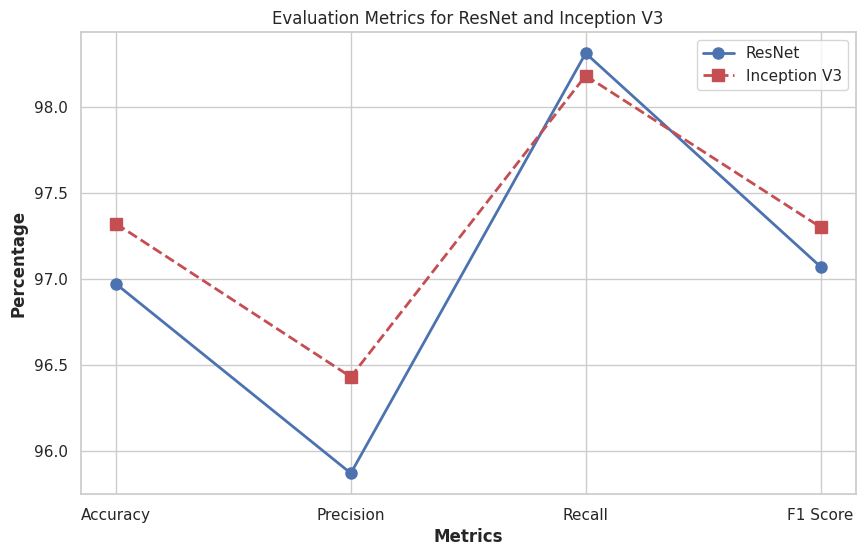

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Metrics for ResNet
resnet_metrics = {
    'Accuracy': 96.97,
    'Precision': 95.87,
    'Recall': 98.31,
    'F1 Score': 97.07
}

# Metrics for Inception V3
inceptionv3_metrics = {
    'Accuracy': 97.32,
    'Precision': 96.43,
    'Recall': 98.18,
    'F1 Score': 97.30
}

# Names of the metrics
metrics_names = list(resnet_metrics.keys())

# Values for the metrics
resnet_values = list(resnet_metrics.values())
inceptionv3_values = list(inceptionv3_metrics.values())

# Set the positions of the points
positions = np.arange(len(metrics_names))

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting the points
plt.plot(positions, resnet_values, 'o-', color='b', label='ResNet', markersize=8, linewidth=2)
plt.plot(positions, inceptionv3_values, 's--', color='r', label='Inception V3', markersize=8, linewidth=2)

# Add title and labels
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Evaluation Metrics for ResNet and Inception V3')
plt.xticks(positions, metrics_names)

# Add legend
plt.legend()

# Show the plot
plt.show()
